<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_0_3_0_7_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.3_0.7'

In [4]:
os.listdir(base_path)

['data_groupwise_0.3_0.7_n20.csv',
 'data_groupwise_0.3_0.7_n30.csv',
 'data_groupwise_0.3_0.7_n60.csv',
 'data_groupwise_0.3_0.7_n120.csv',
 'data_groupwise_0.3_0.7_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.3_0.7_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.065836,20.476308,73.822173,0.149271,180.513588,180.340668,0.172920
1,0.0,1.0,61.521094,99.238196,63.001900,-0.569995,233.191196,233.504998,-0.313802
2,0.0,2.0,35.188924,22.489124,50.627582,0.382724,118.688355,118.678885,0.009470
3,0.0,3.0,92.053040,66.779307,24.416101,-0.253760,192.994687,193.025013,-0.030326
4,0.0,4.0,48.106614,78.222268,44.513677,-0.585770,180.256788,180.857269,-0.600481
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,65.526712,77.333725,21.337458,0.734046,174.931940,174.007559,0.924381
59996,999.0,56.0,79.197340,96.671027,83.378226,-0.472698,268.773895,269.096994,-0.323099
59997,999.0,57.0,69.623038,72.701126,68.505296,-0.963799,219.865661,220.683232,-0.817571
59998,999.0,58.0,89.483485,98.200437,44.397312,-0.413644,241.667590,241.720625,-0.053035


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    76.065836  20.476308  73.822173  ...  180.513588  180.340668  0.172920
      1.0    61.521094  99.238196  63.001900  ...  233.191196  233.504998 -0.313802
      2.0    35.188924  22.489124  50.627582  ...  118.688355  118.678885  0.009470
      3.0    92.053040  66.779307  24.416101  ...  192.994687  193.025013 -0.030326
      4.0    48.106614  78.222268  44.513677  ...  180.256788  180.857269 -0.600481
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   65.526712  77.333725  21.337458  ...  174.931940  174.007559  0.924381
      56.0   79.197340  96.671027  83.378226  ...  268.773895  269.096994 -0.323099
      57.0   69.623038  72.701126  68.505296  ...  219.865661  220.683232 -0.817571
      58.0   89.483485  98.200437  44.397312  ...  241.667590  241.720625 -0.053035
      59.0   41.209662  72.582451  92.242060  ...  217.602554  216.289642  1.312912

[60000 rows x 7 columns]

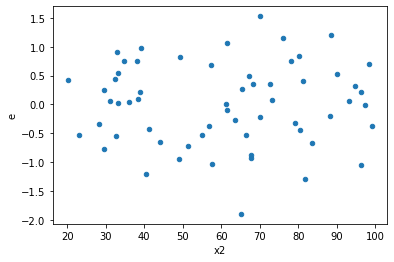

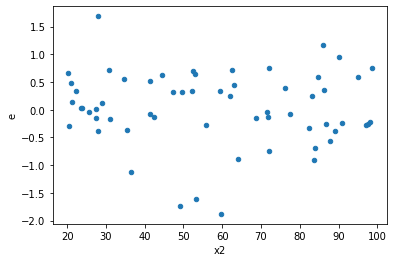

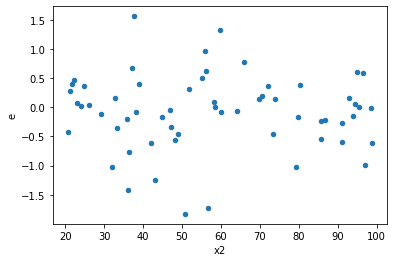

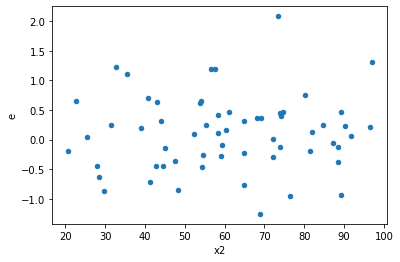

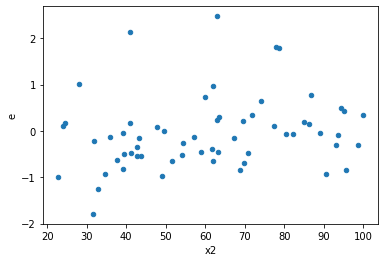

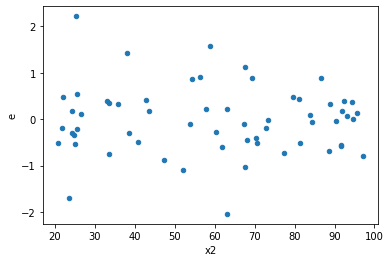

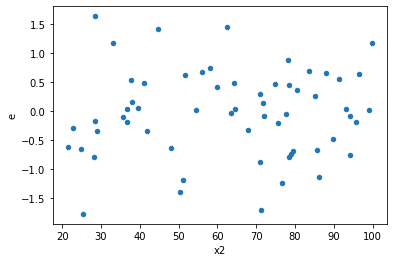

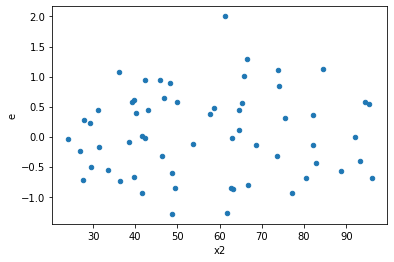

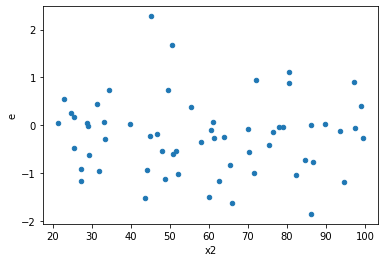

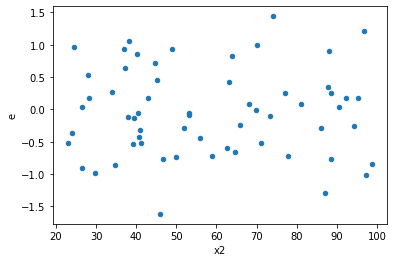

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,10.28869616631456,15.386511050989922,0.4899379126816457,0.7326910024280915,1.4954772502045235,0.36377259125081207,0.818113704374594,0.18188629562540604,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,14.377209610409897,15.585913803121692,0.684629029067138,0.7421863715772234,1.0840708472273108,0.8549959972324226,0.5725020013837887,0.4274979986162113,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,8.727081856562226,9.073743486693964,0.41557532650296314,0.432083023175903,1.0397225138745627,0.929720973698833,0.5351395131505835,0.4648604868494165,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,4.0415221260645025,9.881475861284503,0.19245343457450012,0.47054646958497637,2.444988683238201,0.04632832387495811,0.976835838062521,0.023164161937479055,Reject005=0 : Heteroscedasticity
10.0,21.0,21.0,7.709495525765046,11.455752019903185,0.3671188345602403,0.5455120009477707,1.4859275787395159,0.3714097311830662,0.8142951344084669,0.1857048655915331,Reject005=1 : Homoscedasticity
13.0,21.0,21.0,7.431782314572312,10.8800090757728,0.3538943959320149,0.5180956702748952,1.4639838218133987,0.38953585169648175,0.8052320741517591,0.19476792584824087,Reject005=1 : Homoscedasticity
17.0,21.0,21.0,6.6565251257501,8.62515974210879,0.31697738694048094,0.410721892481371,1.2957450890920887,0.5580029277216543,0.7209985361391729,0.27900146386082714,Reject005=1 : Homoscedasticity
19.0,21.0,21.0,8.401210521407494,9.504067599268875,0.40005764387654735,0.45257464758423216,1.13127359147246,0.7801019947782506,0.6099490026108747,0.3900509973891253,Reject005=1 : Homoscedasticity
20.0,21.0,21.0,8.972395059605214,12.242935896780534,0.42725690760024826,0.5829969474657397,1.3645114615939822,0.4824867458666844,0.7587566270666578,0.2412433729333422,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,9.904262138646809,8.501450714942095,0.4716315304117528,0.40483098642581405,0.8583628538837951,0.7296139564594253,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,10.31445408890542,7.493528517515677,0.4911644804240676,0.35683469131027035,0.7265075255486351,0.4703499779555971,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,10.28869616631456,15.386511050989922,0.4899379126816457,0.7326910024280915,1.4954772502045235,0.36377259125081207,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,14.377209610409897,15.585913803121692,0.684629029067138,0.7421863715772234,1.0840708472273108,0.8549959972324226,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,8.727081856562226,9.073743486693964,0.41557532650296314,0.432083023175903,1.0397225138745627,0.929720973698833,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,8.081393621576003,7.512624221172559,0.3848282676940954,0.35774401053202665,0.9296198864902556,0.8687701929508539,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,8.097176209092336,6.039676215469266,0.3855798194805874,0.28760362930806027,0.7458990714179223,0.5075799758565636,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,15.715821588383635,12.7597123732479,0.7483724565896969,0.6076053511070428,0.8119023432207486,0.6373701469369293,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,4.0415221260645025,9.881475861284503,0.19245343457450012,0.47054646958497637,2.444988683238201,0.04632832387495811,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      920
Reject005=0 : Heteroscedasticity     80
Name: Result_test, dtype: int64